In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
import pickle
import os.path

def savedb(obj,filename):
    with open(filename,'wb') as file:
        pickle.dump(obj,file)
    
def loaddb(filename):
    with open(filename,'rb') as file:
        obj = pickle.load(file)
        return obj
    
# his, epo_it, epo_W1
    
def pickle_exist(CNN_mid_width, CNN_d, drop, reg, lr, CNN_out_width, h_fc, epoch):
    filename = f'pickle/{CNN_mid_width}-{CNN_d}-{drop}-{reg}-{lr}-{CNN_out_width}-{h_fc}-{epoch}.pickle'
    if os.path.isfile(filename):
        return True
    return False

def save_pickle(CNN_mid_width, CNN_d, drop, reg, lr, CNN_out_width, h_fc, epoch, val_acc, his, epo_it, epo_W1, dtype = np.half):
#     W1 = dtype(W1)
    for W1_i in epo_W1.keys():
        epo_W1[W1_i] = dtype(epo_W1[W1_i])
    for key in his.keys():
        his[key] = dtype(his[key])
    obj = (CNN_mid_width, CNN_d, drop, reg, lr, CNN_out_width, h_fc, epoch, val_acc, his, epo_it, epo_W1)
    filename = f'pickle/{CNN_mid_width}-{CNN_d}-{drop}-{reg}-{lr}-{CNN_out_width}-{h_fc}-{epoch}.pickle'
    savedb(obj,filename)
    
def get_pickle(CNN_mid_width, CNN_d, drop, reg, lr, CNN_out_width, h_fc, epoch):
    filename = f'pickle/{CNN_mid_width}-{CNN_d}-{drop}-{reg}-{lr}-{CNN_out_width}-{h_fc}-{epoch}.pickle'
    return loaddb(filename)

In [3]:
from cs231n.vis_utils import visualize_grid

dtype = np.half

def showAcc(loss_his, train_his, vali_his):
    plt.subplot(2, 1, 1)
    plt.plot(loss_his, 'o')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(train_his, '-o')
    plt.plot(vali_his, '-o')
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()
    
def show_net_weights(W1):
    grid = visualize_grid(W1)
    plt.imshow(grid.astype('uint8'))
    plt.axis('off')
    plt.gcf().set_size_inches(5, 5)
    plt.show()

File Not Found: CNN_m: 32, CNN_d: 0, drop: 0.2, reg:0.03, val_acc: 0.6122


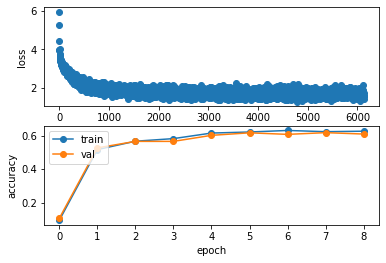

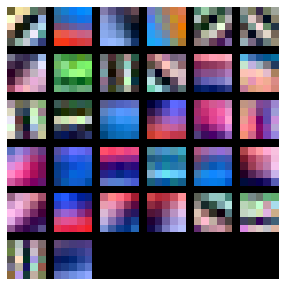

File Not Found: CNN_m: 64, CNN_d: 0, drop: 0.2, reg:0.03, val_acc: 0.5721


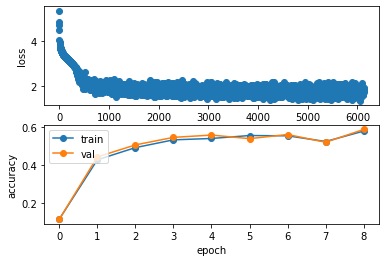

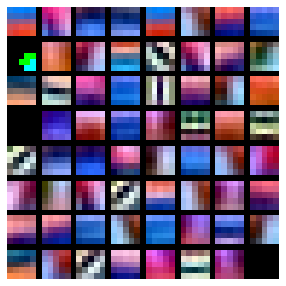

File Not Found: CNN_m: 128, CNN_d: 0, drop: 0.2, reg:0.03, val_acc: 0.5818


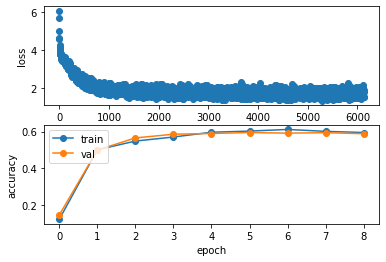

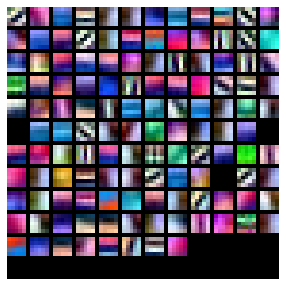

In [4]:
learning_rate = 2e-3
CNN_mid_width=[32, 64, 128]
# CNN_mid_width=[32]
CNN_out_width = 20
dropout = [0, 0.2, 0.5]
# dropout = [0.2]
hidden_fc = 50
epochs=8
regularization = [0.03]
CNN_depth = [0, 2, 4]

overall = len(CNN_mid_width) * len(dropout) * len(regularization) * len(CNN_depth)

i = 0
current = 0
lr = learning_rate
h_fc = hidden_fc
for CNN_m in CNN_mid_width:
    for CNN_d in CNN_depth:
        for reg in regularization:
            for drop in dropout:
                current += 1
                if pickle_exist(CNN_m, CNN_d, drop, reg, lr, CNN_out_width, h_fc, epochs):
                    
                    CNN_mid_width, CNN_d, drop, reg, lr, CNN_out_width, h_fc, epoch, val_acc, his, epo_it, epo_W1 = \
                        get_pickle(CNN_m, CNN_d, drop, reg, lr, CNN_out_width, h_fc, epochs)
                    print(f'File Not Found: CNN_m: {CNN_m}, CNN_d: {CNN_d}, drop: {drop}, reg:{reg}, val_acc: {val_acc}')
                    vali_his = his['vali_his'] 
                    train_his = his['train_his'] 
                    loss_his = his['loss_his'] 
                    showAcc(loss_his, train_his, vali_his)
#                     for key in epo_W1.keys():
#                         print(key)
                    W1 = epo_W1[5]
                    show_net_weights(W1)
                else:
                    print(f'File Not Found: CNN_m: {CNN_m}, CNN_d: {CNN_d}, drop: {drop}, reg:{reg}')

In [6]:
# CNN_mid_width, CNN_d, drop, reg, lr, CNN_out_width, h_fc, epoch, val_acc, his, epo_it, epo_W1 = \
#     get_pickle(128,0,0.2,0.03,0.002,20,50,8)
# print(f'File Not Found: CNN_m: {CNN_m}, CNN_d: {CNN_d}, drop: {drop}, reg:{reg}, val_acc: {val_acc}')
# vali_his = his['vali_his'] 
# train_his = his['train_his'] 
# loss_his = his['loss_his'] 
# showAcc(loss_his, train_his, vali_his)
# W1 = epo_W1[5]
# show_net_weights(W1)